In [1]:
import numpy as np
from scipy.spatial import distance_matrix
from scipy.optimize import linear_sum_assignment

from matplotlib import pyplot as plt

In [40]:
# np.random.seed(15)
np.random.rand(15)

n_robot = 10
n_task = 10

In [41]:
# randomly generates the pose of robots and tasks
robot_pos = np.random.uniform(-1,1,size=(n_robot, 3))
task_pos = np.random.uniform(-1,1,size=(n_task, 3))


In [42]:
robot_pos

array([[-0.9599147 ,  0.35580244, -0.27012248],
       [-0.54930092,  0.01800201, -0.71113951],
       [ 0.8820708 , -0.96812713,  0.455787  ],
       [ 0.71707224,  0.74553041,  0.05681309],
       [-0.18317845,  0.48509715,  0.60083951],
       [-0.46103493, -0.47162759, -0.50447448],
       [ 0.72025863,  0.89509928, -0.69197733],
       [ 0.89077866,  0.00663917, -0.35532082],
       [ 0.51991374,  0.85095727, -0.47896511],
       [-0.83483193, -0.89294378,  0.61025273]])

Hungarian Result: [5 0 9 8 3 2 6 1 7 4]
Hungarian Cost: 7.11
Greedy Result: [0 2 5 7 3 9 6 1 8 4]
Greedy Cost: 7.63


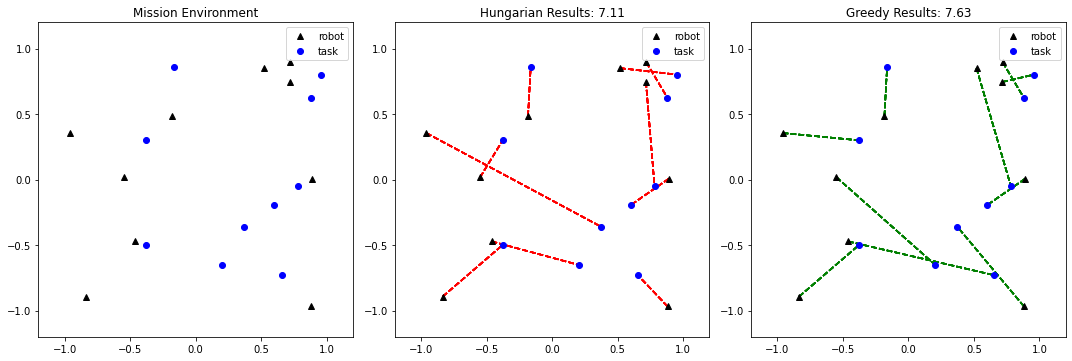

In [43]:

# Create figure
fig, ax = plt.subplots(1,3,figsize=(15,5))


# plot initial mission environment
ax[0].plot(robot_pos[:,0], robot_pos[:,1], 'k^',label="robot")
ax[0].plot(task_pos[:,0], task_pos[:,1], 'bo', label="task")
ax[0].set_title("Mission Environment")
ax[0].set(xlim=(-1.2,1.2),ylim=(-1.2,1.2))
ax[0].set_aspect("equal")
ax[0].legend()

# calculates a distance matrix as the cost
cost = distance_matrix(robot_pos, task_pos)
# Hungarian algorithm
row_ind, col_ind = linear_sum_assignment(cost)
# cacluates the total cost of the result
hungarian_total_cost = cost[row_ind, col_ind].sum()

print("Hungarian Result: {}".format(col_ind))
print("Hungarian Cost: {:.3}".format(hungarian_total_cost))


# -----------------------------------------------------------


# plot Hungarian assignments
for i in range(len(col_ind)):
    ax[1].plot([robot_pos[row_ind,0],task_pos[col_ind,0]],[robot_pos[row_ind,1],task_pos[col_ind,1]],'r--')
ax[1].plot(robot_pos[:,0], robot_pos[:,1], 'k^',label="robot")
ax[1].plot(task_pos[:,0], task_pos[:,1], 'bo', label="task")
ax[1].set_title("Hungarian Results: {:.3}".format(hungarian_total_cost))
ax[1].set(xlim=(-1.2,1.2),ylim=(-1.2,1.2))
ax[1].set_aspect("equal")
ax[1].legend()


# greedy algorithm
greedy_task = []
greedy_total_cost = 0
for robot in range(n_robot):
    cand_task = list(np.argsort(cost[robot, :]))
    while True:
        task = cand_task[0]
        if task not in greedy_task:
            greedy_task.append(task)
            greedy_total_cost += cost[robot, task]
            break
        else:
            cand_task.pop(0)

            
greedy_task = np.array(greedy_task)
print("Greedy Result: {}".format(greedy_task))
print("Greedy Cost: {:.3}".format(greedy_total_cost))

# plot Greedy assignments
for i in range(len(col_ind)):
    ax[2].plot([robot_pos[row_ind,0],task_pos[greedy_task,0]],[robot_pos[row_ind,1],task_pos[greedy_task,1]],'g--')
ax[2].plot(robot_pos[:,0], robot_pos[:,1], 'k^',label="robot")
ax[2].plot(task_pos[:,0], task_pos[:,1], 'bo', label="task")
ax[2].set_title("Greedy Results: {:.3}".format(greedy_total_cost))
ax[2].set(xlim=(-1.2,1.2),ylim=(-1.2,1.2))
ax[2].set_aspect("equal")
ax[2].legend()

fig.tight_layout()
plt.show()